# <center>L2 Computational Physics</center>
---

## Gradient Descent

In this notebook, you shall illustrate the different behaviours of the gradient descent (GD) method when finding the minima of 
*Rosenbrock's Banana Function*,

$$f(x,y) \equiv (1-x)^{2} + 100(y-x^{2})^{2}~.$$

You will generate a plot demonstrating how the behaviour of the GD method changes with different values of the step-size parameter, $\eta$. To do this, you will plot example GD trajectories using three different $\eta$ values. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import matplotlib.colors
from random import random


First, define the functions `f` and `grad` which implement the *banana* function and its **analytical** derivative. 
`r` is a two component array of coordinates.

In [2]:
def f(r):
    '''Function to be minimised'''
    x, y = r
    # YOUR CODE HERE
    return (1-r[0])**2 + 100*(r[1]-r[0]**2)**2
    
def grad(r):
    '''Calculate gradient of banana function at coordinates r = (x,y)'''
    x, y = r
    return [-2*(1-r[0])+200*(-2*r[0])*(r[1]-r[0]**2), 200*(r[1]-r[0]**2)]
    


Before proceeding, ensure that your functions have been written correctly:

In [3]:
# these tests are worth 2 marks 
r = numpy.array([1, 4])
assert numpy.isclose(f(r), 900)
assert numpy.isclose(grad(r), numpy.array([-1200,   600])).all()

Implement the function `gradientDescent`. It takes as argument:

- `df`: the derivative of the the function you want to minimize
- `r0`: an array of two initial values where the algorithm starts
- `eta`: the step size
- `nstep`: the number of steps

It should return the history of points visited, including the initial one.

In [4]:
def gradientDescent(df, r0, eta, nstep):
    #code given initally wrong?
    xy = r0
    #this right?
    x, y = r0
    history = numpy.empty( (nstep+1, 2) )
    # YOUR CODE HERE
    history[0] = r0
    
    for i in range (1, nstep +1):
    
        state= history[i-1] - (eta*numpy.array(df(history[i-1])))
      
        history[i] = state
       
    return history
gradientDescent(grad, [0.3, 0.4], 0.01, 2)

array([[ 0.3       ,  0.4       ],
       [ 0.686     , -0.22      ],
       [-1.20271542,  1.161192  ]])

Test your answer:

In [5]:
# these tests are worth 3 marks 
gdtest = gradientDescent(grad, [0.3,0.4], 0.01, 2)
assert gdtest.shape == (3,2)
assert numpy.isclose(gdtest, numpy.array([
        [ 0.3       ,  0.4       ],
        [ 0.686     , -0.22      ],
        [-1.20271542,  1.161192  ]])).all()

## Plotting task

Create a plot to show the trajectory of the gradient descent optimisation algorithm for different values of $\eta$. Use the values of $\eta$ provided. Start all trajectories at $r_0=(0.2,1)$. [3 marks]

[0.2        0.3568     0.49886555 ... 1.00041478 0.99758422 1.00041478] [1.         0.616      0.4205225  ... 0.99729507 0.99870893 0.99729507]


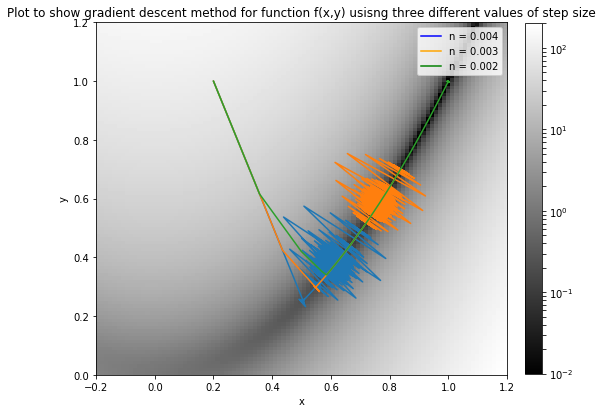

In [8]:
# Generate banana function
N = 100 # Resolution of 2D image
x0 = -0.2
x1 = 1.2
y0 = 0
y1 = 1.2
xs = numpy.linspace(x0, x1, N)
ys = numpy.linspace(y0, y1, N)
dat = numpy.zeros((N, N))

for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        r = [x,y]
        dat[iy, ix] = f(r)

plt.figure(figsize=(8,8))
im = plt.imshow(dat, extent=(x0, x1, y0, y1), origin='lower', cmap=matplotlib.cm.gray, 
                norm=matplotlib.colors.LogNorm(vmin=0.01, vmax=200))
plt.colorbar(im, orientation='vertical', fraction=0.03925, pad=0.04)

# Now generate the trajectories:
import matplotlib.lines as mlines
gammas = [0.004, 0.003, 0.002]  # Gammas to try out
r0 = numpy.array([0.2, 1])  # Initial seed point
nsteps = 100000
x1s =numpy.empty(nsteps+1)
y1s = numpy.empty(nsteps+1)
for n in gammas:
    result = gradientDescent(grad, r0, n ,nsteps)
    for i in range(0, nsteps+1):
        x1s[i] = result[[i],[0]]
    for j in range(0, nsteps+1):
        y1s[j] = result[[j], [1]]
    plt.plot(x1s, y1s)
print(x1s, y1s)

plt.ylabel('y')
plt.xlabel('x')
plt.title('Plot to show gradient descent method for function f(x,y) usisng three different values of step size')
blue_line = mlines.Line2D([], [], linestyle = '-', color ='blue' , label = 'n = 0.004')
orange_line = mlines.Line2D([], [], linestyle = '-', color ='orange' , label = 'n = 0.003')
green_line = mlines.Line2D([], [], linestyle = '-', color ='green' , label = 'n = 0.002')
plt.legend(handles =[blue_line, orange_line, green_line, ] )

Which of the three step size $\eta$ is best? Use the box below to justify your answer. [2 marks]

Best step size is 0.002, the other two values are too large in comparison to the value of the gradient. This means the gradient descent method will lose convergence and the iterations will oscillate around the solution. If the step size is too small the number of iterations to converge to root will be extortionate, however 0.002 gives a suitabble convergence to the minima as shown in the graph plot, whilst for 0.004 and 0.003 you can see the algorithm oscillates and does not reach the solution within 100000 iterations so are not suitable.